## PCA:

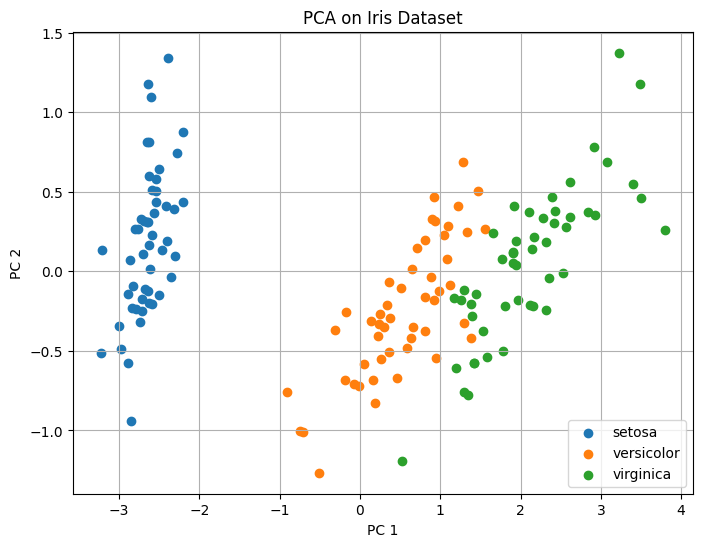

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8, 6))
for i, label in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=label)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

## t-SNE

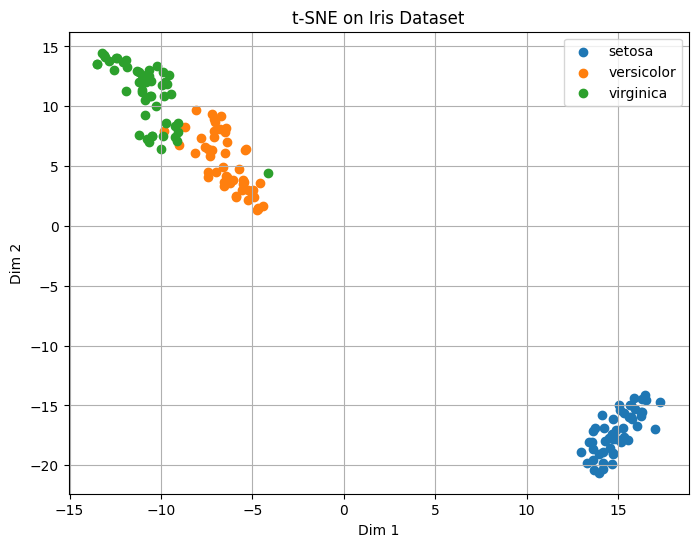

In [2]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot
plt.figure(figsize=(8, 6))
for i, label in enumerate(target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=label)
    
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('t-SNE on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

## Singular Value Decomposition(SVD)

Original TF-IDF shape: (5, 13)
Reduced SVD shape: (5, 2)


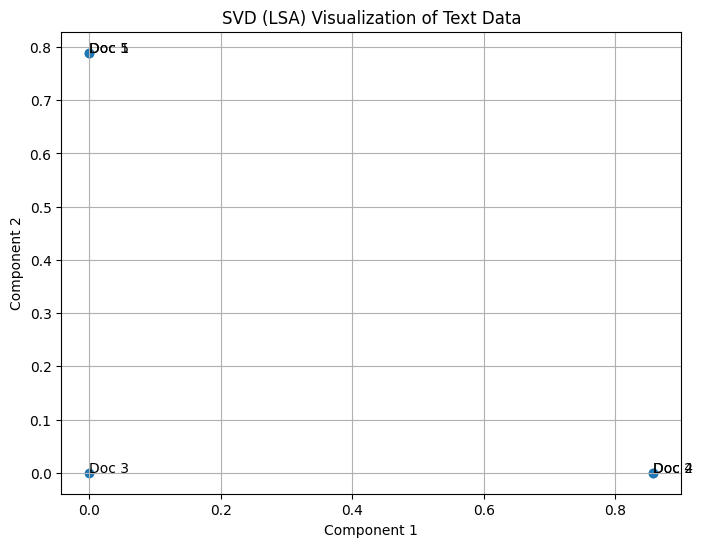

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Sample corpus
corpus = [
    "The cat sat on the mat.",
    "Dogs and cats are great pets.",
    "I love my pet dog.",
    "Cats and dogs can be friends.",
    "My mat is soft and warm."
]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(corpus)

print(f"Original TF-IDF shape: {X_tfidf.shape}")  # Usually sparse and high dimensional

# Apply Truncated SVD (aka LSA)
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_tfidf)

print(f"Reduced SVD shape: {X_svd.shape}")

# Plotting
plt.figure(figsize=(8,6))
plt.scatter(X_svd[:, 0], X_svd[:, 1])
for i, txt in enumerate(corpus):
    plt.annotate(f"Doc {i+1}", (X_svd[i, 0], X_svd[i, 1]))
plt.title("SVD (LSA) Visualization of Text Data")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()